# 프로젝트명
### <네이버 영화 리뷰를 반영한 새로운 평점 시스템 개발>

# 선정 이유
## 
-영화 평점을 보면 별점과 한줄 평을 통한 리뷰사이에 차이가 존재한다.  

(가령 8점을 주고 다소 부정적인 리뷰를 쓴 경우)
## 
-별점 만으로 이 영화가 어떤 부분에서 뛰어난 영화인지 알 수 없다.
 
 (이 영화가 어떤 느낌을 주는지 리뷰데이터를 통해 알아내기)

# 목표
# 
-머신러닝 알고리즘을 통해 해당 리뷰데이터의 긍정 및 부정의 정도를 판단한다.

   이를 반영해 기존 평점을 수정한다.
 # 
-리뷰데이터를 분석해 이 영화에 대한 주된 표현을 몇가지 추출하여 보여준다.

   ex)공포 충격

# 실행계획
## 1.리뷰데이터가져오기&리뷰데이터 분석

1.원하는 영화를 선택하고 해당 영화의 네이버 평점사이트를 웹크롤링한다. (아래는 닥터스트레인지2: 대혼돈의 멀티버스로 진행)

2.웹크롤링을 통해 평점데이터와 리뷰데이터를 받는다,

3.평점데이터와 리뷰데이터를 받으면 평점은 정수형으로 타입캐스트한 후 x축은 평점 y축은 개수에 해당하는 막대그래프를 그린다.

4.8점이상은 긍정평가, 5점이상 7점이하는 보통평가, 4점이하는 부정평가으로 나눠 긍정,보통,부정평가를 백분율로 나타내는 원 그래프를 그린다.

5.위 과정을 함수로 만들어 함수를 통해 실행하도록 한다.

## 2.머신러닝을 통한 리뷰데이터 긍정,부정파악&이를 평점에 대입
1.한글로 된 리뷰데이터를 머신러닝을 통해 감성분석하기 위해 한글 형태소를 나눠주는 패키지인 KoNLPy를 설치한다,

2.지도학습기반의 머신러닝 알고리즘 구성을 위해 미리 학습할 데이터를 https://github.com/e9t/nsmc/ 에 ratings_train.txt와 ratings_test.txt를 다운로드한다.

3.다운로드한 ratings_train.txt와 ratings_test.txt데이터를 데이터 프레임으로 불러오고 불필요한 숫자나 Null값을 공백으로 바꿔준다.

4.KoNLPy를 import하고 okt(open korean text)형태소 분석기를 불러온다.

5.okt 객체를 만든후 이를 통해 데이터프레임에서 리뷰데이터만 추출해 형태소를 분석하고 이를 리스트로 반환한다.

6.사이킷런을 통해 TF-IDF피처 모델을 생성한다. 이때 tokenizer파라미터를 5번에서 만든 함수로 입력해준다.

7.앞에서 다운받은 학습데이터를 TF-IDF모델 객체를 통해 학습시킨다.

8.로지스틱 회귀의 하이퍼파라미터 최적화를 위해 GridSearchCV를 진행하여 최적 파라미터 값을 얻는다.

9.최적파라미터 값으로 설정된 로지스틱 회귀를 통해 ratings_test.txt와 비교하여 머신러닝 성능을 정확도,정밀도,재현율,F1스코어,ROC곡선과 AUC로 측정한다.

10.최적파라미터 값으로 설정된 로지스틱 회귀를 통해 분석을 원하는 리뷰데이터에 대한 긍정,부정여부를 알아낸다.(긍정은1, 부정은 0)

11.보정가중치를 2로 두어 긍정이면 해당 리뷰와 같으 써진 평점에 +2을 부정이면 -2을 더한다.

12.보정된 평점을 MinMaxScaler로 스케일링해 평점을 1점부터 10점사이의 값으로 변환한다.

## 3.기존 영화 평점과 리뷰데이터 분석 후 영화 평점 비교
1.웹크롤링해서 가져온 데이터프레임의 score칼럼의 값을 위의 보정과정을 통해 수정한다.

2.처음에 웹크롤링을 통해 받은 평점을 분석한 결과와 머신러닝을 통해 리뷰를 반영하는 방향으로 보정된 평점을 분석한 결과를 1에서 구현한 함수를 통해 비교한다. 

## 4.리뷰데이터에서 언급된 주요 키워드를 워드클라우드를 통해 시각화
1.한글 불용어 데이터를 https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt 에서 가져온다.

2.리뷰데이터 중 리뷰를 추출하고 한글만 남기도록 데이터 전처리하여 키워드 데이터프레임을 만든다.

3.okt객체를 만들고 nouns 메서드를 통해 키워드 데이터프레임의리뷰들중에서 명사만 추출하도록하고 추출된 명사들을 리스트에 집어넣는다.

4.추출된 명사들 리스트중 1번에서 불러들인 불용어에 해당하는 단어가 있으면 이를 제거한다. 또한 명사 중 한글자로 된 단어도 제거한다.

5.collentions API에서 counter를 호출하여 counter객체를 생성한다.

6.counter의 most_common메서드를 통해 명사들을 명사단어 당 개수를 개수를 많은 순대로 30개 보여주다.

7.추출된 30개의 명사단어를 wordcloud를 통해 보여준다.

# 주의할 점

자연어 처리를 위해 koNLPY패키지를 다운로드할 때 koNLPy는 Java로 만들어진 한글 형태소 엔진을 파이썬 래퍼기반으로 작성한 것이므로 기존에 Java가 설치되어있어야 한다.

또한 파이썬에서 Java클래스를 호출하기 위한 별도의 모듈인 Jpype1도 필요하다. 

Jpype1은https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype 에서 자신의 컴퓨터에 맞는 것을 다운로드받으면 된다. 

In [22]:
#pip install import_ipynb
#pip install --upgrade pip
#pip install JPype1-0.3.0-cp310-cp310-win_amd64.whl
#pip install konlpy

# 1 리뷰데이터가져오기&리뷰데이터 분석

In [6]:
from bs4 import BeautifulSoup
import csv
import urllib.request
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#네이버영화 평점만 url로 가져올 수 있음, 입력파라미터=(주소,마지막 페이지 입력)
def movie_crawling(url,last_page):  
    review_list=[]
    for pg in range(1,last_page+1): #반복문을 통해 페이지당 html을 beautifulsoup객체로 받아와 파싱, 원하는 데이터(평점,리뷰)를 리스트로 반환
        new_url =url.format(pg)
        html = urllib.request.urlopen(new_url)
        soup = BeautifulSoup(html,'html.parser') 
        reviews = soup.select('body > div > div > div.score_result > ul>li')
    
        for index,det_rev in enumerate(reviews): #반복문을 통해 평점과 리뷰를 따로 분리하여 리스트로 반환
            score=det_rev.select_one('div.star_score > em').text
            comment=det_rev.select_one('#_filtered_ment_{0}'.format(index)).text.strip()
            review_list.append([score,comment])

    review_df=pd.DataFrame(review_list,columns=['score','comment']) #위 과정을 통해 얻은 리스트를 데이터 프레임객체로 변환
    return review_df              

# review_df 데이터프레임 객체에 점수 칼럼이 문자형으로 저장되었으므로 이를 정수로 타입캐스트.
def score_to_int(review_df):
    review_df['score']=review_df.iloc[:,0].astype('int')   
    return review_df

#평점과 각 평점의 개수를 가지는 새로운 데이터프레임을 만든다. 이를 통해 x축은 평점, y축은 평점의 개수를 나타내는 막대그래프를 생성하고 보여준다. 이때 평점의 평균을 그래프 왼쪽상단에 표시하도록 한다.
def score_bar(review_df):
    score_count=review_df.groupby(by='score').count() #score칼럼으로 그룹바이 한 후 이를 count하여 score별 개수를 가지는 데이터프레임을 얻는다.
    score_count.reset_index(inplace=True)
    score_count['count']=score_count['comment']
    score_count.drop('comment',axis=1,inplace=True)
    display(score_count)                             #score와  score개수를 가지는 데이터프레임을 보여준다.
    scores=score_count['score'].astype('int').tolist() #각 score과 그 개수를 각각 리스트로 반환한다.
    counts=score_count['count'].astype('int').tolist()
    array_score=np.array(scores) #score리스트와 count리스트를 배열의 형태로 변경
    array_count=np.array(counts)
    sort_index=np.argsort(array_score) #기존 인덱스에서 score 배열을 정렬했을 시 인덱스를 반환
    array_count[sort_index] 
    scores.sort()
    plt.figure(figsize=(10,8))
    plt.bar(x=scores,height=array_count[sort_index],color='skyblue') #x축은 점수, y축은 개수로 막대그래프 그리기
    plt.xlabel('scores',fontdict={'size':20},color='white') #라벨 만들기
    plt.ylabel('counts',fontdict={'size':20},color='white')
    plt.xticks(np.arange(1, 11))
    plt.title('Score-Count',fontdict={'size':27},color='orange')
    plt.text(1,score_count['count'].max(),s='average={0}'.format(review_df.mean()[0]),fontdict={'size':20}) #그래프의 왼쪽 상단에 점수의 평균을 보여주는 텍스트 만들기
    plt.show()
    
#입력파라미터는 리스트로 평점을 리스트로 받는다. 그 후에 8점 초과는 긍정, 6점 초과는 보통, 그 이하는 부정으로 평점을 분류하고 이 긍정,보통,부정의 개수를 리스트로 반환한다.
def score_jud(score_list):
    presult,sresult,nresult=0,0,0
    for i in score_list:
        if i>=8:
            presult+=1
        elif i>=5:
            sresult+=1
        else:
            nresult+=1
    clf_score=[presult,sresult,nresult] 
    return clf_score  #긍정,보통,부정 순서대로 해당 개수를 리스트로 반환

# 입력파라미터는 위 함수에서 반환한 리스트로 위 score_jud를 통해 받은 긍정,보통,부정평가 개수를 원 그래프를 통해 백분율로 나타낸다.
def pi_jud(clf_score):
    emo= ['positive', 'normal', 'negative']

    plt.pie(clf_score, labels=emo, autopct='%.2f%%') #각 라벨을 퍼센티지로 나타내는 원그래프를 보여준다.
    plt.show()
    print('긍정은{0:.2f}퍼센트,보통은{1:.2f}퍼센트 부정은{2:.2f}퍼센트입니다.'
          .format((clf_score[0]/sum(clf_score))*100,(clf_score[1]/sum(clf_score))*100,(clf_score[2]/sum(clf_score))*100))

#위 내용을 일련의 과정으로 진행하는 함수를 만든다.
def review_analysis(url,last_page):
    review_df=movie_crawling(url,last_page)
    score_to_int(review_df)
    review_df
    score_bar(review_df)
    score_list=review_df['score'].tolist()
    clf_score=score_jud(score_list)
    pi_jud(clf_score)

### review_analysis함수를 통해 평점별 개수 막대그래프와 긍정 보통 부정의 퍼센티지를 보여주는 원그래프를 보여준다

,score,count
0,1,28
1,2,33
2,3,9
3,4,51
4,5,21
5,6,87
6,7,64
7,8,68
8,9,23
9,10,116


C:\Users\82106\AppData\Local\Temp/ipykernel_37200/1688246631.py:43: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.text(1,score_count['count'].max(),s='average={0}'.format(review_df.mean()[0]),fontdict={'size':20}) #그래프의 왼쪽 상단에 점수의 평균을 보여주는 텍스트 만들기


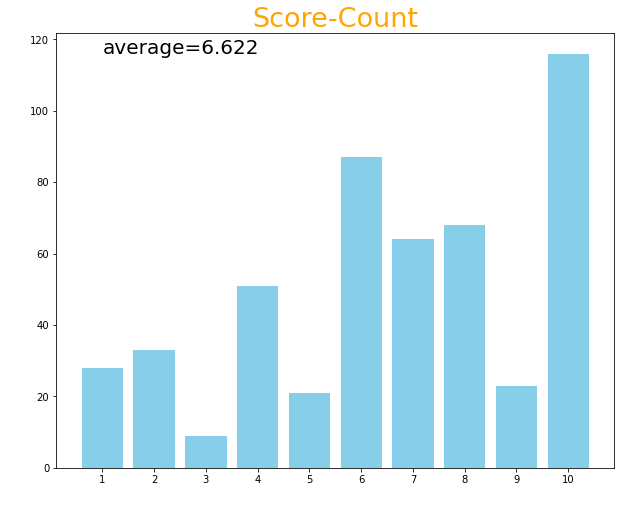

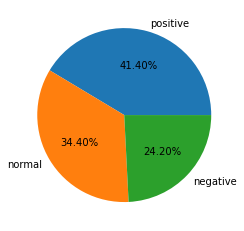

긍정은41.40퍼센트,보통은34.40퍼센트 부정은24.20퍼센트입니다.


In [8]:
review_analysis("https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=182016&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={0}",50)

### 평점과 리뷰를 review_df 데이터프레임 객체로 다시 불러들이고 평점을 숫자형으로 전환한다.

In [9]:
review_df=movie_crawling("https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=182016&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={0}",50)
score_to_int(review_df)

,score,comment
0,4,음표 날리는거 유치해서 피식했음ㅎㅎ
1,10,난 너무 재미있었다구ㅋ
2,10,완다 명대사 : 입? 무슨 입?
3,7,금쪽이 완다와 스트레인저 박사님의 진혹한 멀티버스 모험
4,10,완다가 불쌍해ㅜㅜㅜㅠ그리고 배우들이 일인다중역할 연기하는거 보는데 어마어마함
...,...,...
495,7,완다 역할의 엘리자베스 올슨이 돋보인다
496,8,확실히 호불호가 갈릴듯 싶다. 난 불호지만..
497,6,유치하게 계속 이어가는건가
498,7,완다가 가장 기억에 남는다. 세계관의 확장이 즐거우면서도 피로하게 다가옴.


# 2.머신러닝을 통한 리뷰데이터 긍정,부정파악&이를 평점에 대입

### 머신러닝을 위해 학습할 데이터와 이를 검증할 데이터를 받아온다. 
### 본 데이터들은 임의적인 리뷰로 긍정이면 라벨값을 1 ,부정이면 라벨값을 2라둔다.

In [10]:
text_train_df=pd.read_csv('ratings_train.txt',sep='\t')
text_train_df

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149996,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149997,8549745,평점이 너무 낮아서...,1
149998,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149999,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [11]:
text_test_df=pd.read_csv('ratings_test.txt',sep='\t')
text_test_df

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


### 정규표현식을 통해 리뷰에 숫자데이터를 지우고 Nan값도 공백으로 바꾼다. 
### konlpy를 통해 okt객체를 생성하고 okt를 통해 문장을 어근별로 분리하는 함수를 정의한다. 

In [12]:
import re
from konlpy.tag import Okt

text_train_df=text_train_df.fillna('')
text_train_df['document']=text_train_df['document'].apply(lambda x: re.sub(r'\d+','',x))
text_train_df=text_train_df.iloc[:,[-2,-1]]
review_df['comment']=review_df['comment'].apply(lambda x: re.sub(r'\d+','',x))

text_test_df=text_test_df.fillna('')
text_test_df['document']=text_test_df['document'].apply(lambda x: re.sub(r'\d+','',x))
text_test_df=text_test_df.iloc[:,[-2,-1]]


okt=Okt()
def okt_tokenizer(document):
    okt_token=okt.morphs(document)
    return okt_token
a=(review_df['comment'][0])
okt_tokenizer(a)

['음표', '날리는거', '유치해서', '피식', '했음', 'ㅎㅎ']

### Tfidfvectorizer에서 어근 추출은 위에서 정의한 okt_tokenizer함수를 입력파라미터로 적고 ngram은 (1,2)로 지정한다. 
### 머신러닝학습을 위해 text_train_df의 데이터를 TF-IDF벡터화한다.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

tfidf=TfidfVectorizer(tokenizer=okt_tokenizer,ngram_range=(1,2),min_df=3,max_df=0.9)
tfidf.fit(text_train_df['document'])
text_count_model=tfidf.transform(text_train_df['document'])
text_count_model

C:\Users\82106\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<150001x129246 sparse matrix of type '<class 'numpy.float64'>'
	with 3066934 stored elements in Compressed Sparse Row format>

### 머신러닝 모델은 logisticregression으로 지정하고 solver은 liblinear로 지정한다. 
### 파라미터중 c는 본인이 미리 돌려본결과 최적치가 3점내외로 나와 2.8,3.3,3.1,3.2,3.5로 지정하고 페널티는 l1과 l2로 지정한다.
### gridsearchcv를 통해 cv를 3으로 지정해 교차검증을 진행하고 이 모델을 통해 test데이터를 학습시켜 파라미터조합별 예측정확도와 최 

### 적파라미터, 그떄의 예측정확도를 파악한다.

In [14]:
lg_clf=LogisticRegression(random_state=134,solver='liblinear')
params={'C':[2.8,3,3.1,3.2,3.5], 'penalty': ['l1', 'l2']}
grid_cv=GridSearchCV(lg_clf,param_grid=params,cv=3,scoring='accuracy',verbose=1,n_jobs=-1)
grid_cv.fit(text_count_model,text_train_df['label'])
param_df=pd.DataFrame(grid_cv.cv_results_)
display(param_df[['params','mean_test_score','rank_test_score']])
print('최적 파라미터와 그때의 예측정확도')
print(grid_cv.best_params_,round(grid_cv.best_score_,4))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


,params,mean_test_score,rank_test_score
0,"{'C': 2.8, 'penalty': 'l1'}",0.850874,6
1,"{'C': 2.8, 'penalty': 'l2'}",0.858914,5
2,"{'C': 3, 'penalty': 'l1'}",0.850681,7
3,"{'C': 3, 'penalty': 'l2'}",0.859041,4
4,"{'C': 3.1, 'penalty': 'l1'}",0.850601,8
5,"{'C': 3.1, 'penalty': 'l2'}",0.859141,1
6,"{'C': 3.2, 'penalty': 'l1'}",0.850528,9
7,"{'C': 3.2, 'penalty': 'l2'}",0.859081,3
8,"{'C': 3.5, 'penalty': 'l1'}",0.850314,10
9,"{'C': 3.5, 'penalty': 'l2'}",0.859121,2


최적 파라미터와 그때의 예측정확도
{'C': 3.1, 'penalty': 'l2'} 0.8591


### 최적파라미터일때 estimator로 테스트 데이터를 평가하고 예측정확도와 정밀도, 재현율, F1스코어를 보여준다.

In [15]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score


prestimator=grid_cv.best_estimator_

pre_comment=tfidf.transform(text_test_df['document'])
prepred=prestimator.predict(pre_comment)
print('테스트 데이터셋 예측 정확도:{0:.4f}'.format(accuracy_score(text_test_df['label'],prepred)))
print('테스트 데이터셋 정밀도:{0:.4f}'.format(precision_score(text_test_df['label'],prepred)))
print('테스트 데이터셋 재현율:{0:.4f}'.format(recall_score(text_test_df['label'],prepred)))
print('테스트 데이터셋 F1스코어:{0:.4f}'.format(f1_score(text_test_df['label'],prepred)))

테스트 데이터셋 예측 정확도:0.8618
테스트 데이터셋 정밀도:0.8680
테스트 데이터셋 재현율:0.8557
테스트 데이터셋 F1스코어:0.8618


### x축은 FPR(1-특이성) y축은 재현율인 ROC곡선을 나타내고 그 면적인 AUC를 구한다.

AUC값:0.9364


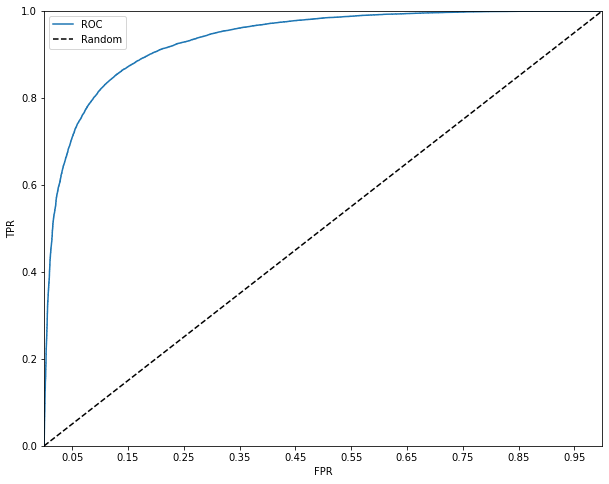

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

prepred_proba=prestimator.predict_proba(pre_comment)[:,1]
fprs,tprs,thresholds=roc_curve(text_test_df['label'],prepred_proba)
plt.figure(figsize=(10,8))
plt.plot(fprs,tprs,label='ROC')
plt.plot([0,1],[0,1],'k--',label='Random')

start,end=plt.xlim()
plt.xticks(np.round(np.arange(start,end,0.1),2))
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

auc_value=roc_auc_score(text_test_df['label'],prepred_proba)
print('AUC값:{0:.4f}'.format(auc_value))

### 머신러닝을 통해 긍정(1)로 분류된 리뷰는 평점(스코어)에+2를 하고 부정(0)으로 분류된 리뷰는 평점(스코어)에-2를한다.

In [17]:
review_comment=tfidf.transform(review_df['comment'])
estimator=grid_cv.best_estimator_
pred=estimator.predict(review_comment)
review_df['classification']=pred
for v,i in enumerate(review_df['classification']):
    if i==0:
        review_df.iloc[v,0]=review_df.iloc[v,0]-2
    else:
        review_df.iloc[v,0]=review_df.iloc[v,0]+2

pd.set_option('display.max_rows', 500)
review_df['classification'].astype('int')
display(review_df)

,score,comment,classification
0,2,음표 날리는거 유치해서 피식했음ㅎㅎ,0
1,12,난 너무 재미있었다구ㅋ,1
2,8,완다 명대사 : 입? 무슨 입?,0
3,9,금쪽이 완다와 스트레인저 박사님의 진혹한 멀티버스 모험,1
4,8,완다가 불쌍해ㅜㅜㅜㅠ그리고 배우들이 일인다중역할 연기하는거 보는데 어마어마함,0
5,10,쿠키영상 꼭 보세요. 두번째 쿠키영상 대박이네요.,1
6,12,완다가 가장 빛나는 영화,1
7,5,볼만은 했는데 베토벤 운명은 좀 심하잖아 감독새꺄,0
8,12,나는 영화보고 되게 슬펐어. 완다 행복했으면 좋겠다,1
9,12,샘 레이미 죽지 않았다 마블 최초의 스타일이라고 해도 좋을것 같다 (좋은 의미) 큐...,1


### MinMaxScaler를 통해 변경된 평점을 0점부터 10까지로 전환한다.

In [18]:
from sklearn.preprocessing import MinMaxScaler
score_1d=np.array(review_df['score'])
score_1d=score_1d.reshape(-1,1)
scaler=MinMaxScaler(feature_range=(1, 10))
scaler.fit(score_1d)
score_scaled=scaler.transform(score_1d)
review_df['score']=np.round(score_scaled,0)
display(review_df)

,score,comment,classification
0,3.0,음표 날리는거 유치해서 피식했음ㅎㅎ,0
1,10.0,난 너무 재미있었다구ㅋ,1
2,7.0,완다 명대사 : 입? 무슨 입?,0
3,8.0,금쪽이 완다와 스트레인저 박사님의 진혹한 멀티버스 모험,1
4,7.0,완다가 불쌍해ㅜㅜㅜㅠ그리고 배우들이 일인다중역할 연기하는거 보는데 어마어마함,0
5,9.0,쿠키영상 꼭 보세요. 두번째 쿠키영상 대박이네요.,1
6,10.0,완다가 가장 빛나는 영화,1
7,5.0,볼만은 했는데 베토벤 운명은 좀 심하잖아 감독새꺄,0
8,10.0,나는 영화보고 되게 슬펐어. 완다 행복했으면 좋겠다,1
9,10.0,샘 레이미 죽지 않았다 마블 최초의 스타일이라고 해도 좋을것 같다 (좋은 의미) 큐...,1


# 3. 기존 영화 평점과 리뷰데이터 분석 후 영화 평점 비교

### 위 과정을 통해 새롭게 수정된 평점을 평점별 막대그래프와 긍정 보통 부정의 퍼센티지를 보여주면서 수정되기 전 그래프와 비교한다.

,score,classification,count
0,1.0,26,26
1,2.0,37,37
2,3.0,42,42
3,4.0,87,87
4,5.0,45,45
5,6.0,43,43
6,7.0,71,71
7,8.0,21,21
8,9.0,46,46
9,10.0,82,82


C:\Users\82106\AppData\Local\Temp/ipykernel_37200/1688246631.py:43: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.text(1,score_count['count'].max(),s='average={0}'.format(review_df.mean()[0]),fontdict={'size':20}) #그래프의 왼쪽 상단에 점수의 평균을 보여주는 텍스트 만들기


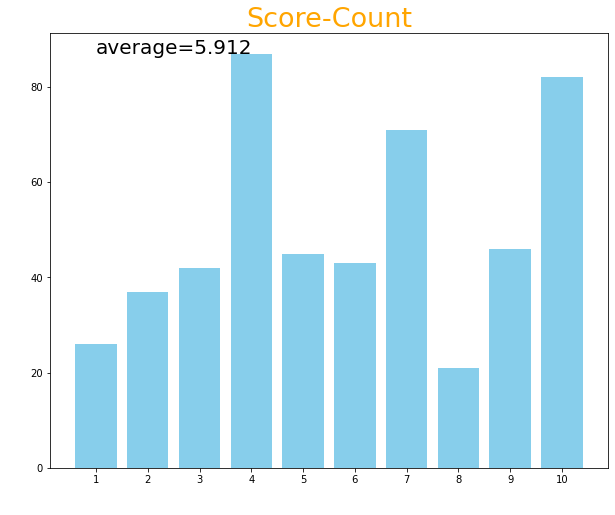

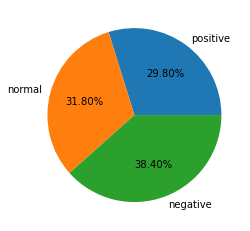

긍정은29.80퍼센트,보통은31.80퍼센트 부정은38.40퍼센트입니다.


In [19]:
score_bar(review_df)
score_list=review_df['score'].tolist()
clf_score=score_jud(score_list)
pi_jud(clf_score)

# 결론

닥터스트레인지 영화의 네이버평점과 리뷰데이터를 크롤링하고 이를 분석하였을 때 평균은6.622점이었다. 또한 긍정은41.40퍼센트,보통은34.40퍼센트 부정은24.20퍼센가 나왔다.

리뷰데이터를 logisticregression을 사용하여 긍정,부정을 판단하기위해 만든 머신러닝 알고리즘의 예측정확도는 0.8618 정밀도는0.868 재현율은:0.8557
F1스코어는0.8618이 나왔고 AUC값은 0.9364가 나왔다. 

따라서 리뷰데이터의 긍정,부정을 예측하는데 사용할 수 있는 수준이라 파악했다. 

실제로 예측을 한 후 긍정은+1,부정은-2를 더한 후 데이터스케일링을 하여 기존 평점처럼 0점에서 10점으로 변환한 결과 평점과 평점개수를 나타내는 막대그래프는 기존의 막대그래프(머신러닝을 통해 긍정,부정예측하기전)보다 낮은 평점의 개수가 증가한것을 확인 할 수 있었다. 또한 긍정과 보통 부정의 퍼센티지를보면 긍정은29.80퍼센트,보통은31.80퍼센트 부정은38.40퍼센트가 나와 처음보다 긍정은 확연히 줄고 부정이 늘은것을 알 수 있다.

다만 머신러닝의 정확도가 0.8618인만큼 올바르게 예측하지 못한 점이있고 한글데이터다보니 어근별로 토큰화하는 과정에서 조사나 어미처리같이 쉽지않은 부분도 많았다. 또한 긍정과 부정임을 이진수적으로 파악할뿐 어느정도의 긍정인지 어느정도의 부정인지는 알 수 없어 모든 리뷰를 2만큼 수정하게 되어 아쉬움이컸다.

#  4.리뷰데이터에서 언급된 주요 키워드를 워드클라우드를 통해 시각화

### 한글 불용어데이터를 데이터프레임 객체를 통해 불러온다.
### 리뷰데이터를 re.sub을 통해 불필요한 문자를 지운다.
### okt.nouns를 통해 리뷰드 중에서 명사만 추출하고 이를 리스트에 저장한다.
### 저장된 명사중 불용어리스트에 있는 단어거나 한글자로 된 것들은 리스트에서 제거한다.

In [20]:
stop_words=pd.read_csv('korean_stopwords.txt')
stop_words

keyword_df=review_df[['comment']]
keyword_df['comment'] = keyword_df['comment'].apply(lambda x: re.sub(r'[^ㄱ-ㅣ가-힝+]', ' ', x))

wokt = Okt()

comment_nouns = []
for cmt in keyword_df['comment']:
    comment_nouns.extend(wokt.nouns(cmt))

overlap_words=[]
comment_nouns = [x for x in comment_nouns if x not in stop_words['불용어'].tolist()]
comment_nouns=[x for x in comment_nouns if len(x)!=1]

C:\Users\82106\AppData\Local\Temp/ipykernel_37200/1981097234.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_df['comment'] = keyword_df['comment'].apply(lambda x: re.sub(r'[^ㄱ-ㅣ가-힝+]', ' ', x))


### counter객체를 생성하고 위 과정에서 추출된 명사를 명사 : 개수로 개수가 많은 순으로 30개 추출한다.
### 추출된 명사들은 빈도를 wordcloud를 통해 보여준다.

마블 : 138
완다 : 73
연출 : 63
닥스 : 47
스토리 : 42
음표 : 33
연기 : 33
레이미 : 33
멀티버스 : 31
느낌 : 31
감독 : 30
기대 : 26
호러 : 24
배우 : 20
공포영화 : 20
혼돈 : 20
트레인 : 20
공포 : 18
그냥 : 18
액션 : 18
닥터 : 17
드라마 : 16
이해 : 15
완다비전 : 15
자체 : 15
중간 : 15
캐릭터 : 15
호불호 : 15
쿠키 : 14
정도 : 14


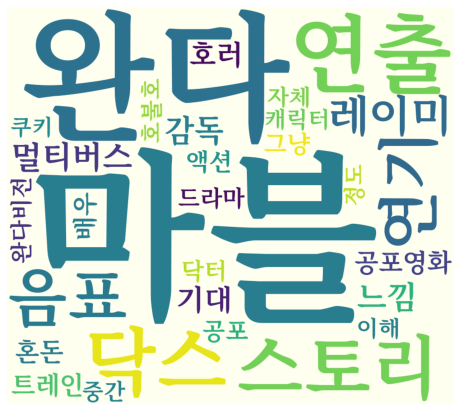

In [21]:
from collections import Counter

comment_word_count = Counter(comment_nouns)

max = 30
com_top= {}
for word, counts in comment_word_count.most_common(max):
    com_top[word] = counts
    print(f'{word} : {counts}')

from wordcloud import WordCloud

wc = WordCloud(font_path='MaruBuri-Bold.ttf',background_color='ivory', width=900, height=800)
cloud = wc.generate_from_frequencies(com_top)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

# 결론

리뷰데이터중 명사만 추출하여 많이 언급된 순으로 counter객체를 생성한뒤  탑 30개를 워드클라우드를 통해 보여주었다. 추출된 명사중에서는 영화와 직결되는 단어도 있었으나 다소 애메하다 볼 수 있는 '자체','트레인'등 영화와 크게 연관짓기 힘든 단어도 같이 추출되어 이 영화가 어떤 영화인지 파악하는데 오히려 방해가 되었다. 또한 자주 언급된 단어만 추출한것이다 보니 적게 언급되었지만 중요한 단어는 볼 수 없어서 아쉬운 점이 남았다.이외에도 형용사 단어만 추출할 수 있어 워드클라우드를 작성하면 더 좋을 것이라고 생각이 들었다.
따라서 형용사와 명사만을 추출하고 그중 이 영화가 어떤 영화인지를 잘 나타낼 수 있는 단어만을 추출하는 머신러닝 알고리즘을 작성해보는것이 괜찮을것같다고 생각이들어 머신러닝과 자연어처리에 대한 공부를 더 진행해보고 실행해보기로 마음먹었다.